# GENERAMOS LAS INSTANCIAS:

H1 velocidad FB<BT<DP
H2 BT va a alejarse mas de su complejidad calculada teoricamente
H3 armar hipotesis en torno a instancias particulares, si lo que le damos es asi, esperamos asa




m: 1
s:[24,19,15,8]
c:[5,4,7,8]
B:[2,1,3,1]

##### Importamos las librerias a usar

In [1]:
import math, subprocess, time, random, os, shutil, sys
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def save_instance(dataset, instance_name, b,c, m):
    with open(F"instances/{dataset}/{instance_name}.txt", "w") as f:
        print(len(c), m, file=f)
        for j in range(0,len(c)): 
            print(b[j], file=f, end=" ")
            print(c[j], file=f, end=" \n")


In [13]:
def clean_data(nombre):
    try:
        shutil.rmtree("instances/"+nombre)
    except OSError as e:
        print ("Error: %s - %s." % (e.filename, e.strerror))
    if os.path.isfile("results/result.csv"):
        df = pd.read_csv("results/result.csv")
        df =  df[df.dataset != nombre]
        df.to_csv("results/result.csv", index=False)

    os.makedirs("instances/"+nombre, exist_ok=False)

In [50]:
def plot(title,bf=True,bt=True,bto=True,btf=True,dp=True,l = False,x=9,y=7):
    fig = plt.figure(figsize =(x, y))
    
    if (l) :
        l = "" 
    else:
        l = "o" 
    
    if (bf):
        df_bf = df_resultados[(df_resultados["method"]=="bf")]
    if(bt):
        df_bt = df_resultados[(df_resultados["method"]=="bt")]
    if(bto):
        df_bto = df_resultados[(df_resultados["method"]=="bto")]
    if(btf):
        df_btf = df_resultados[(df_resultados["method"]=="btf")]
    if(dp):
        df_dp = df_resultados[(df_resultados["method"]=="dp")]

    plt.plot()

    #puntos
    if (bf):
        plt.plot(df_bf["n"],df_bf["time"],l, c="black", label="bf")
    if(bt):
        plt.plot(df_bt["n"],df_bt["time"],l, c="blue", label="bt")
    if(bto):
        plt.plot(df_bto["n"],df_bto["time"],l, c="green", label="bto")
    if(btf):
        plt.plot(df_btf["n"],df_btf["time"],l, c="r", label="btf")
    if(dp):
        plt.plot(df_dp["n"],df_dp["time"],l, c="purple", label="dp")

    plt.legend()
    plt.grid()



    plt.title(title)
    plt.xlabel('n') 
    plt.ylabel('Clocks')  
    plt.show()

In [52]:
def exp2():
    filas_indice = []
    
    nombre = "bf_random"
        
    clean_data(nombre)
    for n in tqdm(range(12, 43,3), "Generating instances"):
       
        
        #damos valores a n,w,b,c
        m= np.random.randint(100,1000)
        b = np.random.randint(100, size=n)
        c = np.random.randint(100, size=n)
        save_instance(nombre, nombre+F"-{n}",b,c, m)
        filas_indice.append([nombre, nombre + f"-{n}", n, m, "instances/"+nombre+"/"+nombre+f"-{n}.txt"])
    pd.DataFrame(filas_indice, columns=["dataset", "instance", "n", "m", "file"]).to_csv("instances/"+nombre+"/indice.csv", index=False, header=True)

In [6]:
def exp2():
    filas_indice = []
    nombre = "escalera"


    clean_data(nombre)
    
    
    for n in tqdm(range(1, 52,5), "Generating instances"):
        
        #damos valores a n,w,b,c
        m = int(((n**2/2)- (((n**2)/2)/5)))
        b = list(range(0,n))
        c = list(range(n,0,-1))
        save_instance(nombre, nombre+F"-{n}",b,c, m)
        filas_indice.append([nombre, nombre + f"-{n}", n, m, "instances/"+nombre+"/"+nombre+f"-{n}.txt"])
    pd.DataFrame(filas_indice, columns=["dataset", "instance", "n", "m", "file"]).to_csv("instances/"+nombre+"/indice.csv", index=False, header=True)

In [7]:
def exp3():
    filas_indice = []
    nombre = "escalera2"
        
    clean_data(nombre)
        
    for n in tqdm(range(50, 501,50), "Generating instances"):
        
        #damos valores a n,w,b,c
        m = int(((n**2/2)- (((n**2)/2)/5)))
        c = list(range(0,n))
        b = list(range(n,0,-1))
        save_instance(nombre, nombre+F"-{n}",b,c, m)
        filas_indice.append([nombre, nombre + f"-{n}", n, m, "instances/"+nombre+"/"+nombre+f"-{n}.txt"])
    pd.DataFrame(filas_indice, columns=["dataset", "instance", "n", "m", "file"]).to_csv("instances/"+nombre+"/indice.csv", index=False, header=True)

#### En esta seccion nos centraremos en correr los experimentos con las instancias generadass mas arriba

#### Funciones a usar:

In [43]:
def run_program(method, test_file):
    #corre el programa con el metodo indicado en el test file indicado y devuelve el tiempo tomado en ejecutar
    #leemos la instancia
    
    start = time.time() #comenzamos a medir el timepo
    proc = subprocess.Popen(["../src/tp1",test_file,method], stderr=subprocess.PIPE,stdout = subprocess.PIPE, stdin=subprocess.PIPE, universal_newlines = True) #lanzamos proceso
    #
    
    exit_code = proc.wait()#esperamos a que el proceso termien
    
    end = time.time() #terminamos de medir el tiempo
    
    #mandamos error de ser necesario 
    if exit_code != 0: raise RuntimeError(F"Hubo un error en la experimentacion para el algoritmo: {method} con la instancia {test_file}.")
    
    return end-start #devolvemos el timepo
    

In [51]:
def run_experiments(name):
    #recibe un nombre para darle al archivo de salida y lo que hace es correr todos los experimentos que se encuentren en la lista llamada experiments que debe ser generada con anterioridad
    columns = ["dataset","exp_name","n", "m", "method", "time"]
    rows = []
    j = 1
    T =10 # Numero de veces que se ejecuta cada experimento (para mayor fidelidad del tiempo).
    explen = str(len(experiments))
    
    
    for exp in tqdm(experiments, "Completed experiments"):
#         print(exp)
        times = []
        for i in range(0, T):
            times.append(run_program(exp[3], exp[4]))
        rows.append([exp[0], name, exp[1], exp[2],exp[3], np.mean(times)])
    result = pd.DataFrame(rows, columns=columns)
    
    if os.path.isfile("results/result.csv"):
        df = pd.read_csv("results/result.csv")
        df = pd.concat([df, result], ignore_index = True, axis = 0)
    else:
        df = result
    
    
    df.to_csv("results/result.csv", index=False, header=True)

## Corrida de experimentos

#### Leemos los indices de las instancias generadas anteriormente 

#### Experimento 1:

En este experimento probaremos con casos aleatorios elegidos uniformemente usando la funcion randint

In [31]:
# exp1()
# instance = "prueba"
# df_data = pd.read_csv("instances/"+instance+"/indice.csv");
# experiments = [] #vaciamos lista para llenarla con los datos que queremos
# name = "prueba-exp"

# #llenamos la lista de experimentos
# for k in range(0, len(df_data)):
#     row_k = df_data.iloc[k]
# #     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bf", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bt", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bto", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "btf", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "dp", row_k["file"]])

# #corremos los experimentos
# run_experiments(name)

# #veamos el resultado
# df_resultados = pd.read_csv("results/result.csv")
# df_resultados = df_resultados[(df_resultados["dataset"]==instance)]
# display(df_resultados[0:10])

# li = True
# plot("exp2", l = li)
# plot("exp2",bf = False, dp = False, l = li)
# plot("exp2",btf = False, bto = False, l = li)



In [56]:
exp2()
instance = "bf_random"
df_data = pd.read_csv("instances/"+instance+"/indice.csv");
experiments = [] #vaciamos lista para llenarla con los datos que queremos
name = "bf_random_exp"

#llenamos la cola de experimentos
for k in range(0, len(df_data)):
    row_k = df_data.iloc[k]
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bf", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bt", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bto", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "btf", row_k["file"]])
#     experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "dp", row_k["file"]])

#corremos los experimentos
run_experiments(name)

#veamos el resultado
df_resultados = pd.read_csv("results/result.csv")
df_resultados = df_resultados[(df_resultados["dataset"]==instance)]
display(df_resultados[0:10])
li = True
plot("exp2", l = li)
plot("exp2",bf = False, dp = False, l = li)
plot("exp2",btf = False, bto = False, l = li)


Generating instances:   0%|          | 0/11 [00:00<?, ?it/s]

Completed experiments:   0%|          | 0/11 [00:00<?, ?it/s]

KeyboardInterrupt: 

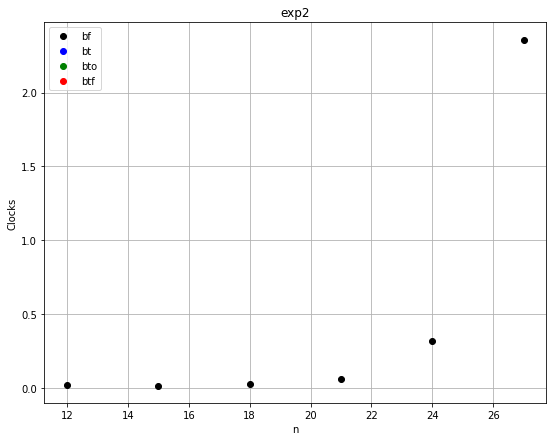

In [54]:
plot("exp2",bf = True, dp = False, l = False)

In [ ]:
exp3()
instance = "escalera2"
df_data = pd.read_csv("instances/"+instance+"/indice.csv");
experiments = [] #vaciamos lista para llenarla con los datos que queremos
name = "escalera2-exp"

#llenamos la cola de experimentos
for k in range(0, len(df_data)):
    row_k = df_data.iloc[k]
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bf", row_k["file"]])
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bt", row_k["file"]])
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "bto", row_k["file"]])
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "btf", row_k["file"]])
    experiments.append([row_k["dataset"], row_k["n"], row_k["m"], "dp", row_k["file"]])

#corremos los experimentos
run_experiments(name)

#veamos el resultado
df_resultados = pd.read_csv("results/result.csv")
df_resultados = df_resultados[(df_resultados["dataset"]==instance)]
display(df_resultados[0:10])
li = True
plot("exp3", l = li)
plot("exp3",bf = False, dp = False, l = li)
plot("exp3",btf = False, bto = False, l = li)

# ANALISIS

In [9]:
df_resultados = pd.read_csv("results/result.csv")
df_resultados = df_resultados[(df_resultados["dataset"]=="prueba")]
display(df_resultados[0:10])

,dataset,exp_name,n,m,method,time
0,prueba,exp1,4,150,bf,0.018622
1,prueba,exp1,4,150,bt,0.013074
2,prueba,exp1,4,150,bto,0.011284
3,prueba,exp1,4,150,btf,0.013608
4,prueba,exp1,4,150,btof,0.010690
5,prueba,exp1,4,150,dp,0.012128
6,prueba,exp1,5,150,bf,0.010163
7,prueba,exp1,5,150,bt,0.011962
8,prueba,exp1,5,150,bto,0.010401
9,prueba,exp1,5,150,btf,0.012272


In [ ]:
display(df_aleatorio[:20])